## Pawan
### Cat Breed classifier using CNN


#### importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

#### Mounting google drive to get dataset

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


#### unziping the folder

In [3]:
!unzip /content/gdrive/MyDrive/cat_breed_dataset/images.zip

Archive:  /content/gdrive/MyDrive/cat_breed_dataset/images.zip
   creating: images/
   creating: images/train/
   creating: images/train/Bombay/
  inflating: images/train/Bombay/45143098_853.resized.jpg  
  inflating: images/train/Bombay/46384644_36506.resized.jpg  
  inflating: images/train/Bombay/46268695_46996.resized.jpg  
  inflating: images/train/Bombay/45890501_454.resized.jpg  
  inflating: images/train/Bombay/46669188_631.resized.jpg  
  inflating: images/train/Bombay/39964227_2632.resized.jpg  
  inflating: images/train/Bombay/46107982_327.resized.jpg  
  inflating: images/train/Bombay/46635625_6701.resized.jpg  
  inflating: images/train/Bombay/46264578_47410.resized.jpg  
  inflating: images/train/Bombay/46601974_11880.resized.jpg  
  inflating: images/train/Bombay/46524130_21778.resized.jpg  
  inflating: images/train/Bombay/46672330_87.resized.jpg  
  inflating: images/train/Bombay/44204923_1264.resized.jpg  
  inflating: images/train/Bombay/44879947_1004.resized.jpg  
  

In [4]:
picture_size = 48
folder_path = "/content/images/"

## Making Training & validation dataset

In [5]:


batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"Validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)



Found 4202 images belonging to 10 classes.
Found 506 images belonging to 10 classes.


#### adding layer to our CNN

In [6]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 10

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [7]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 25

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
32/32 [==============================] - 52s 107ms/step - loss: 2.5387 - accuracy: 0.1521 - val_loss: 91.8036 - val_accuracy: 0.1172
Epoch 2/25
32/32 [==============================] - 2s 53ms/step - loss: 2.2157 - accuracy: 0.2301 - val_loss: 19.2943 - val_accuracy: 0.1172
Epoch 3/25
32/32 [==============================] - 2s 51ms/step - loss: 2.0881 - accuracy: 0.2583 - val_loss: 12.3516 - val_accuracy: 0.1172
Epoch 4/25
32/32 [==============================] - 2s 52ms/step - loss: 2.0282 - accuracy: 0.2741 - val_loss: 4.6408 - val_accuracy: 0.1510
Epoch 5/25
32/32 [==============================] - 2s 51ms/step - loss: 1.9376 - accuracy: 0.3200 - val_loss: 2.2467 - val_accuracy: 0.2240
Epoch 6/25
32/32 [==============================] - 2s 51ms/step - loss: 1.8556 - accuracy: 0.3383 - val_loss: 2.5775 - val_accuracy: 0.2604
Epoch 7/25
32/32 [==============================] - 2s 51ms/step - loss: 1.8096 - accuracy: 0.3592 - val_loss: 2.0520 - val_accuracy: 0.2969
Epoch 8/

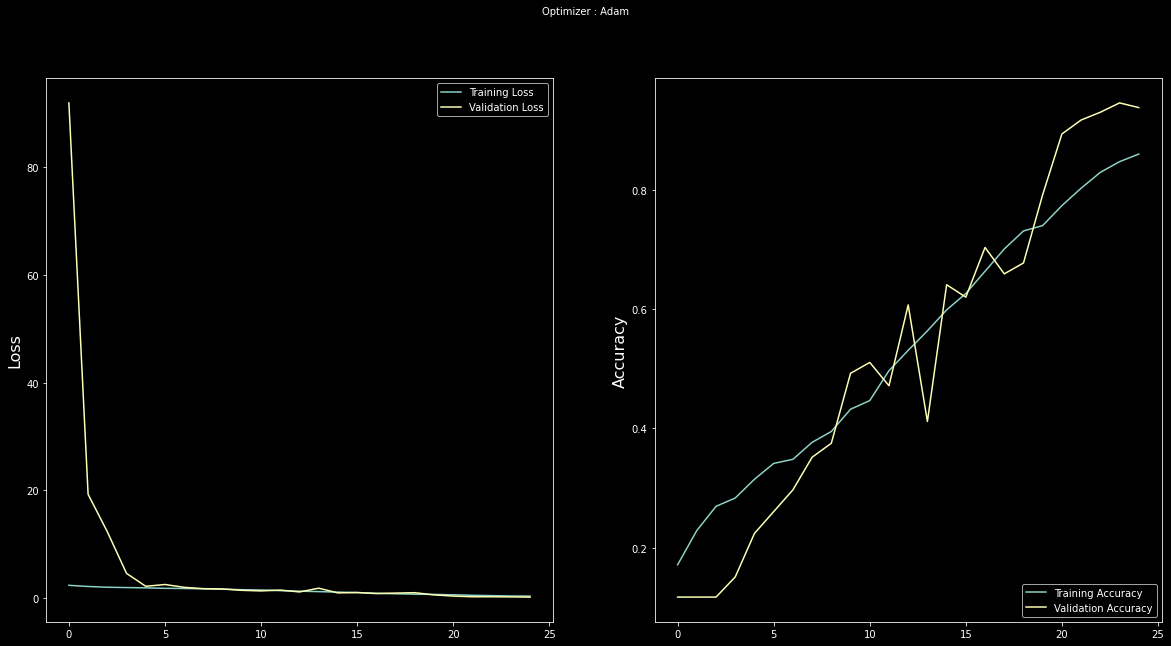

In [9]:


plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

